https://www.kaggle.com/datasets/yasserh/loan-default-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
import graphviz
from sklearn import metrics

### Reading and looking at the dataset

In [2]:
df = pd.read_csv('Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


### Checking for missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

### Check if any feature only one unique value
### If a feature has one unique value along all rows we will not include that feature because it has no weight

In [4]:
for s in df:
    if len(df[s].unique()) == 1:
        print(f'{s}:', df[s].unique())

year: [2019]


### See how many unique values the features with the type of object have
### We will convert those values to integer categorical values with a numpy int type

In [5]:
for s in df:
    if df[s].dtype == 'object':
        print(f'{s}:', len(df[s].unique()))

loan_limit: 3
Gender: 4
approv_in_adv: 3
loan_type: 3
loan_purpose: 5
Credit_Worthiness: 2
open_credit: 2
business_or_commercial: 2
Neg_ammortization: 3
interest_only: 2
lump_sum_payment: 2
construction_type: 2
occupancy_type: 3
Secured_by: 2
total_units: 4
credit_type: 4
co-applicant_credit_type: 2
age: 8
submission_of_application: 3
Region: 4
Security_Type: 2


### Changing object type values to categorical numbers

In [6]:
for s in df.drop(['Status', 'ID', 'year'], axis=1):
    if df[s].dtype == 'object':
        for i in range(len(df[s].unique())):
            df[s][df[s]==df[s].unique()[i]] = i

C:\Users\User\AppData\Local\Temp\ipykernel_10572\145174962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s][df[s]==df[s].unique()[i]] = i


In [7]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,0,0,0,0,0,0,0,0,...,0,758,0,0,0,98.728814,0,0,1,45.0
1,24891,2019,0,1,0,1,0,0,0,1,...,1,552,1,1,0,NaN,1,0,1,NaN
2,24892,2019,0,1,1,0,0,0,0,0,...,0,834,0,2,0,80.019685,0,0,0,46.0
3,24893,2019,0,1,0,0,1,0,0,0,...,0,587,0,3,1,69.376900,1,0,0,42.0
4,24894,2019,0,2,1,0,0,0,0,0,...,2,602,1,0,1,91.886544,1,0,0,39.0


### Filling missing values with a mean value and changing the type of object to int64

In [8]:
for s in df:
    df[s].fillna(df[s].mean(), inplace=True)
    if df[s].dtype == 'object':
        df[s] = df[s].astype('int64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  float64
 3   Gender                     148670 non-null  int64  
 4   approv_in_adv              148670 non-null  float64
 5   loan_type                  148670 non-null  int64  
 6   loan_purpose               148670 non-null  float64
 7   Credit_Worthiness          148670 non-null  int64  
 8   open_credit                148670 non-null  int64  
 9   business_or_commercial     148670 non-null  int64  
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

### Plotting a correlation matrix on a heat map excluding ID and year

<AxesSubplot: >

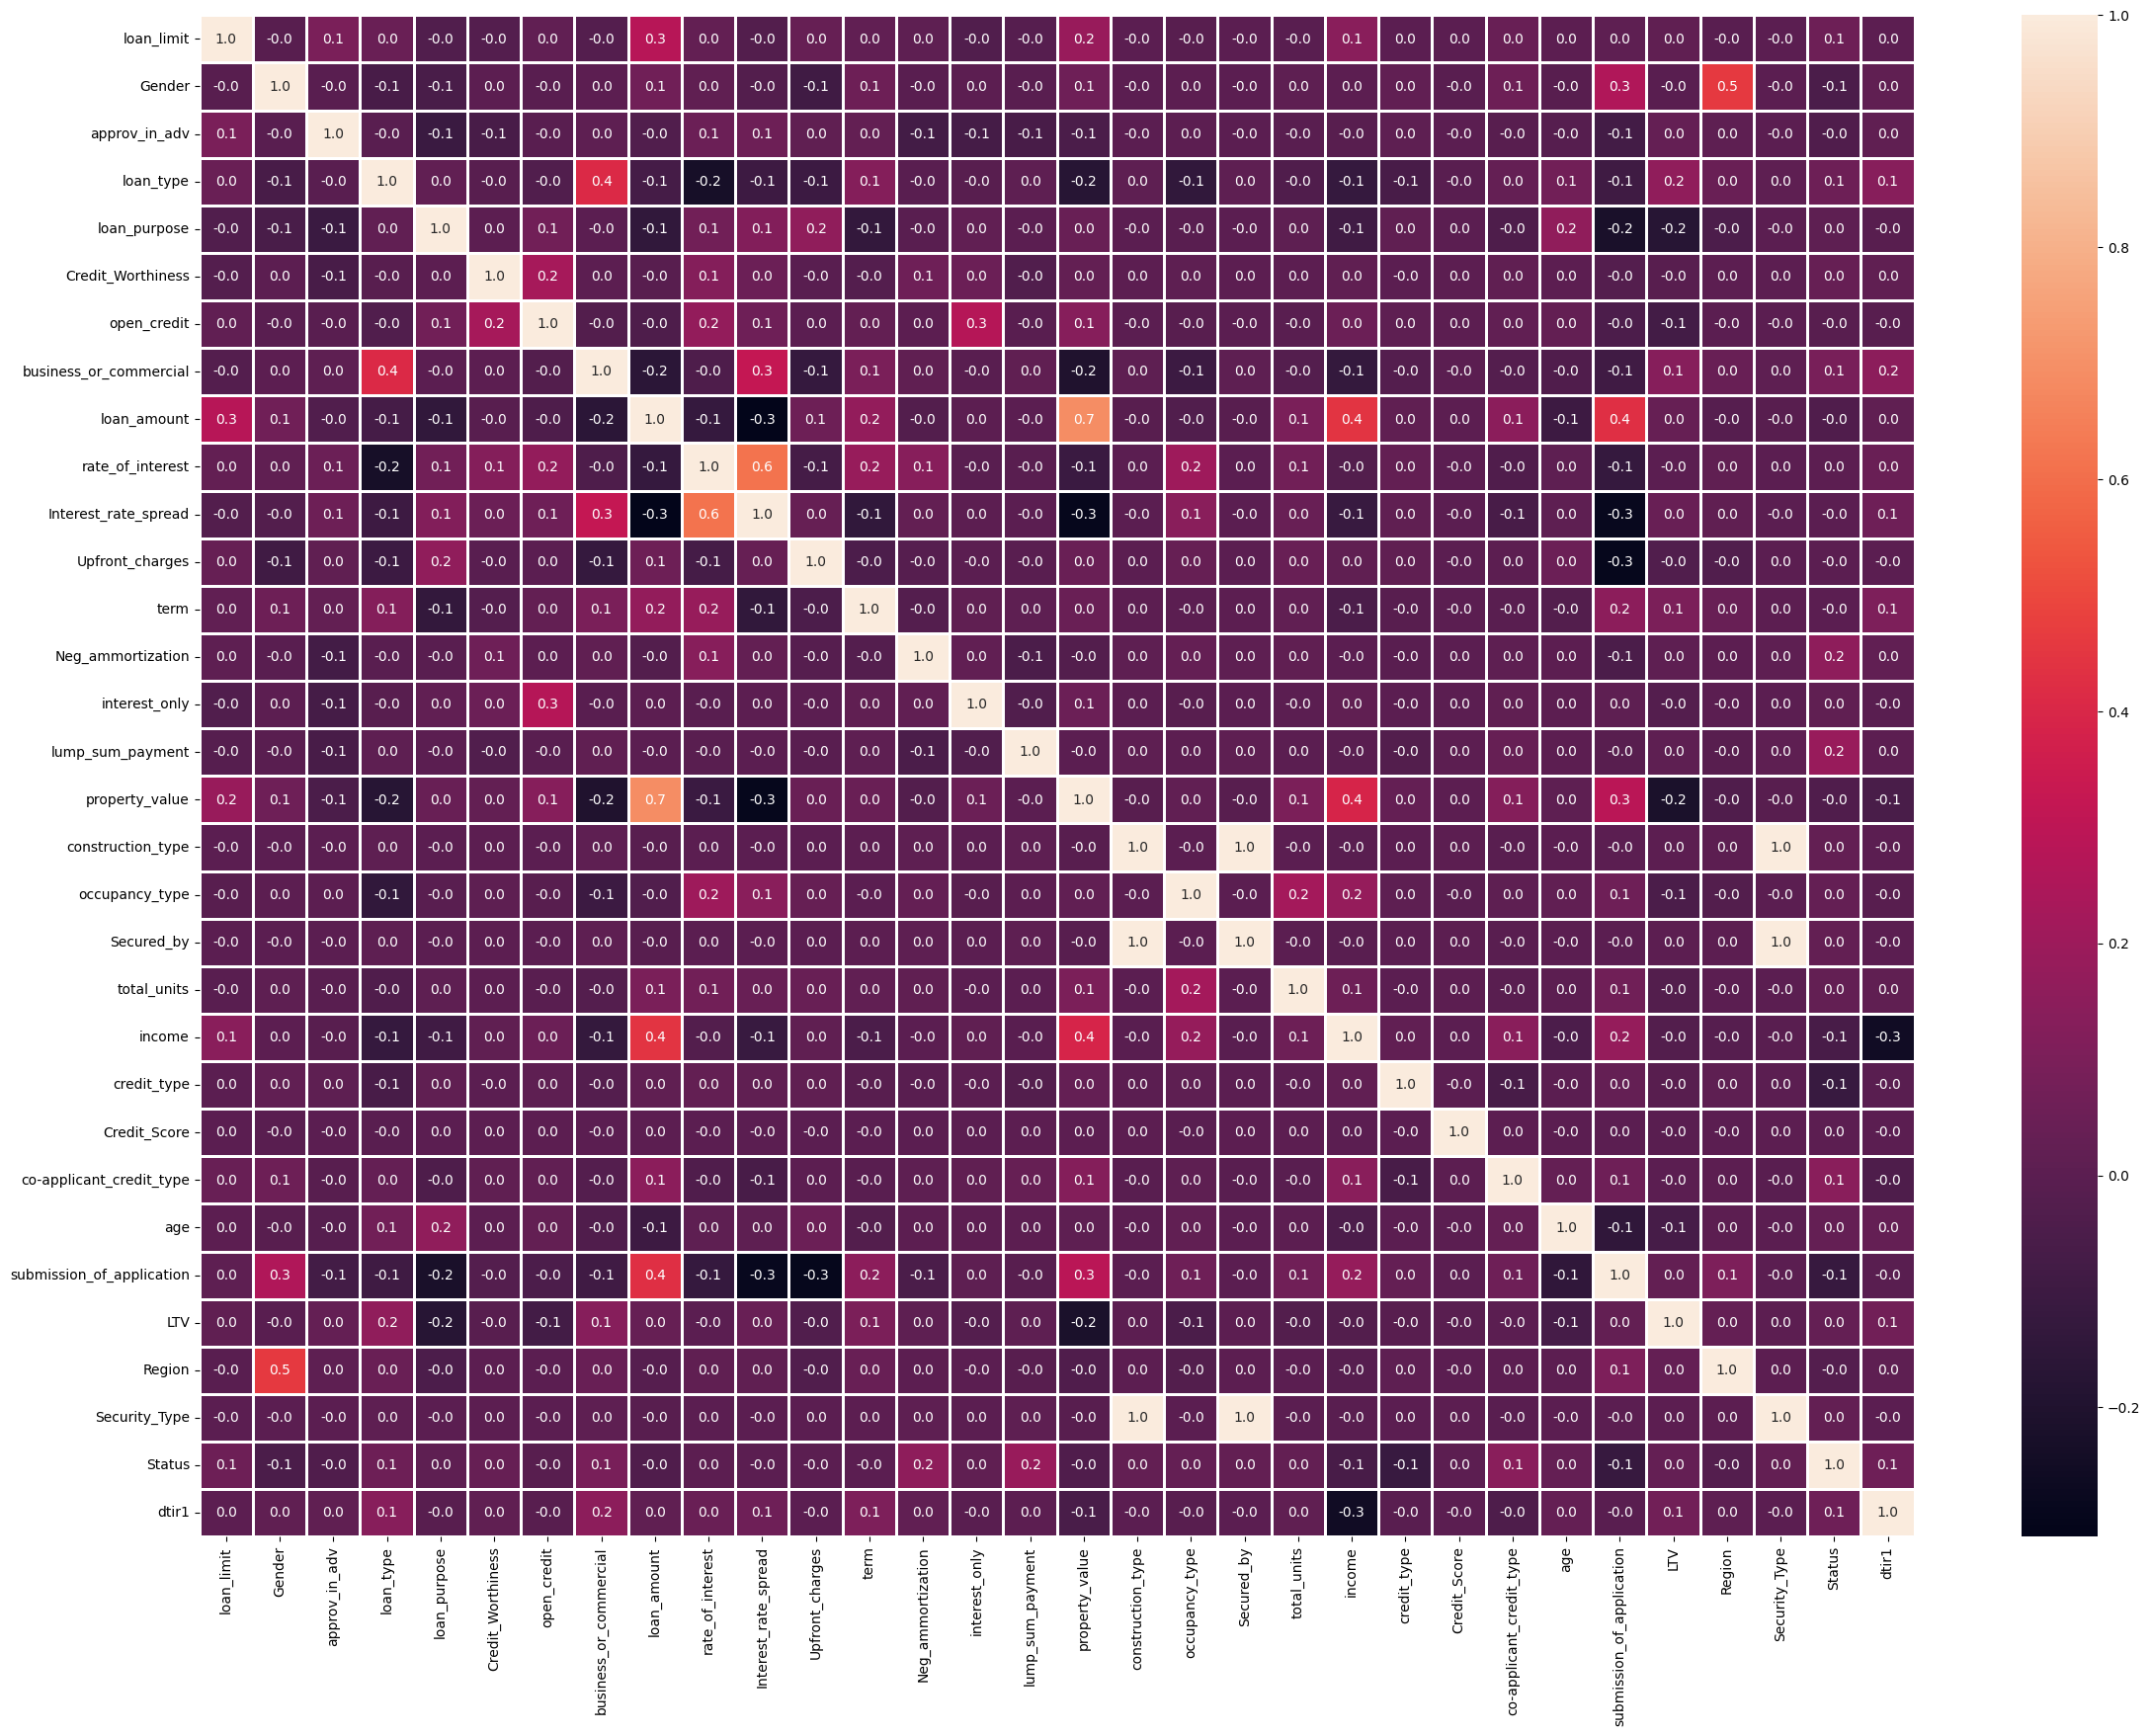

In [10]:
plt.figure(figsize=(28,20))
sns.heatmap(df.drop(['ID', 'year'], axis=1).corr(), annot=True, linewidths=1, fmt='.1f')

### Some of the following features are highly correlated and some have correlation of 1.0:
* **interest_rate_spread** and **rate_of_interest** - 0.6
* **property_value** and **loan_amount** - 0.7
* **Secured_by** and **construction_type** - 1.0
* **Security_type** and **construction_type** - 1.0
* **Security_type** and **Secured_by** - 1.0

### We will exclude one of the highly correlated features from our model

### Defining X and y for our model

In [11]:
X = df.drop(['Status', 'ID', 'year', 'Interest_rate_spread', 'property_value', 'Security_Type', 'Secured_by'], axis=1)
y = df['Status']

### Check if y has imbalanced data

In [12]:
dist_ratios = y.value_counts() / y.shape[0]
print('Class Distribution Ratios')
print(f'Non-Defaulter: {dist_ratios[0].round(3)}')
print(f'Defaulter: {dist_ratios[1].round(3)}')

Class Distribution Ratios
Non-Defaulter: 0.754
Defaulter: 0.246


### Splitting our dataset into train and test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression

In [34]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [35]:
y_pred = log_reg.predict(X_test)

### Building a confussion matrix

In [36]:
log_reg_conf_matrix = metrics.confusion_matrix(y_test, y_pred)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in log_reg_conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in log_reg_conf_matrix.flatten()/np.sum(log_reg_conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

<AxesSubplot: >

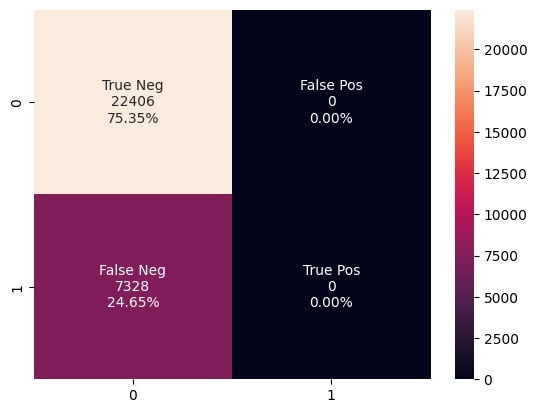

In [37]:
sns.heatmap(log_reg_conf_matrix, annot=labels, fmt='')

### We have perfect prediction for True Negatives(non-defaulters) but the model predicted all defaulters as False Negatives, in fact it should be True Positives
### With this result the model predicts all inputs as non-defaulters although some amount of them are defaulters

In [17]:
print('Accurancy:', metrics.accuracy_score(y_test, y_pred))

Accurancy: 0.7565077016210399


In [18]:
print('Precision:', metrics.precision_score(y_test, y_pred))

Precision: 0.0


D:\Python_and_DS\Startup_IT_Academy\PDS3\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
print('Recal:', metrics.recall_score(y_test, y_pred))

Recal: 0.0


### Decision Tree

In [38]:
dec_tree = DecisionTreeClassifier().fit(X_train, y_train)

### Saving the decision trees to a png file and visualizing it

In [39]:
target = np.unique(y).astype('str')
feature_names = X.columns
dot_data = export_graphviz(dec_tree, feature_names=feature_names, class_names=target)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('dec_tree', view=True)

'dec_tree.png'

### Predicting and building a confussion matrix

In [40]:
y_pred = dec_tree.predict(X_test)

In [41]:
dec_tree_conf_matrix = metrics.confusion_matrix(y_test, y_pred)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in dec_tree_conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in dec_tree_conf_matrix.flatten()/np.sum(dec_tree_conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

<AxesSubplot: >

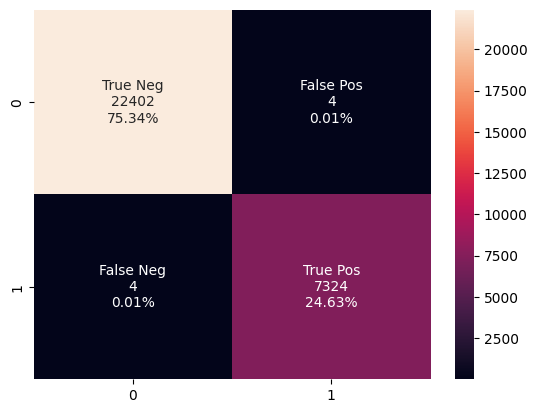

In [42]:
sns.heatmap(dec_tree_conf_matrix, annot=labels, fmt='')

### Metrics

In [43]:
print('Accurancy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1:', metrics.f1_score(y_test, y_pred))

Accurancy: 0.9997309477365979
Precision: 0.9994541484716157
Recall: 0.9994541484716157
F1: 0.9994541484716157


### Calculating and visualizing AUC

In [26]:
y_pred_proba = dec_tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

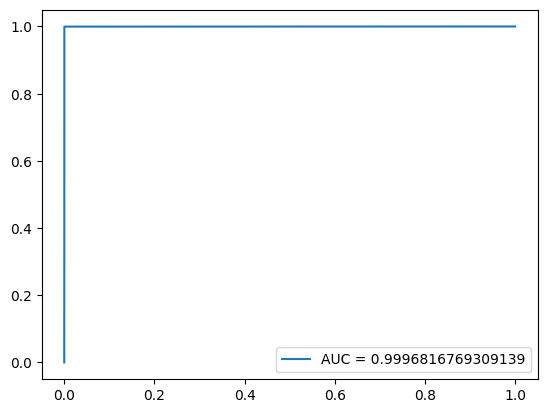

In [27]:
plt.plot(fpr,tpr, label="AUC = "+str(auc))
plt.legend(loc=4)
plt.show()